<h1>Decision Tree</h1>

In [1]:
#importing

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus #decision tree model creation, graph of decision tree creation
from IPython.display import Image #visualization

In [6]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [7]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [14]:
#one hot encoding
x= dataset[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]

#pd.get_dummies converts categorical variable into dummy/indicator variable and for vice versa use from_dummies

In [15]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [44]:
#For converting data of Windy (True or False)to Dummy Varible when it is not converted
# dataset_new1 = dataset.copy()                                      # Create copy of DataFrame
# dataset_new1['x1'] = dataset_new1['x1'].astype(int)                # Transform boolean to integer
# print(dataset_new1)                                             # Print updated pandas DataFrame

#Or

#x= dataset['Windy'].astype(int) 

In [17]:
y = dataset["DEATH_EVENT"]

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [64]:
#x.loc[:, 'Windy'].replace([0, 1], [True,False], inplace=True)

In [65]:
#x

In [19]:
import sklearn

In [20]:
#decision tree model
model=sklearn.tree.DecisionTreeClassifier(
    criterion='entropy', random_state=100
)
#The entropy value is always 0-1

In [21]:
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=100)

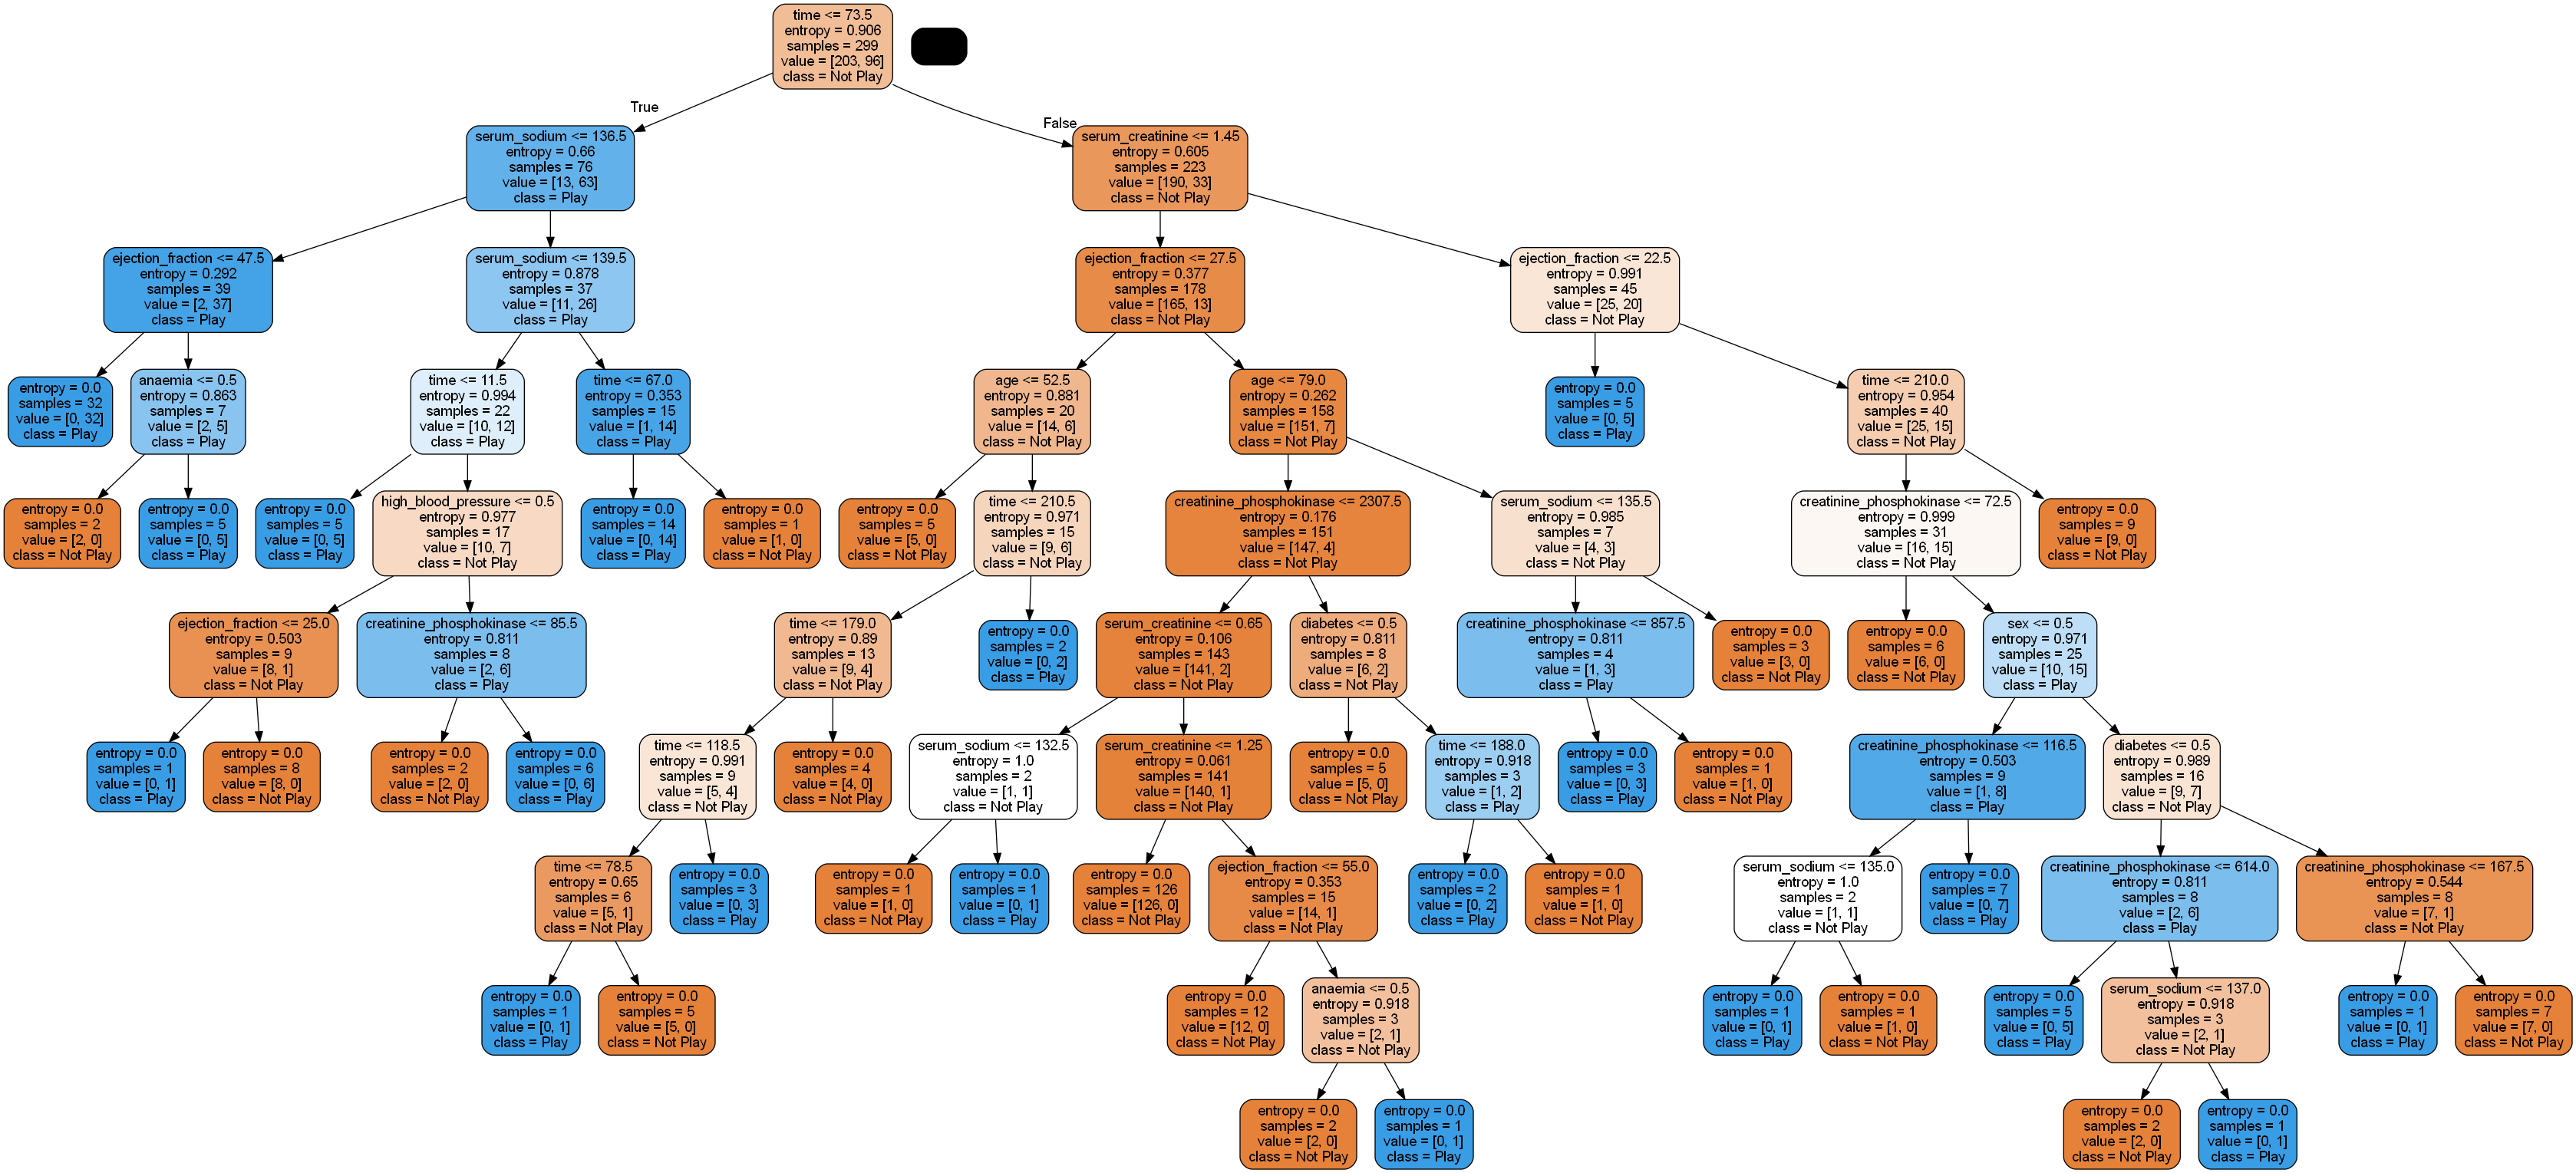

In [28]:
data_plot = tree.export_graphviz(model, out_file=None, feature_names= list(x.columns.values), class_names=['Not Play', 'Play'],
                                 rounded= True, filled=True)
graph = pydotplus.graph_from_dot_data(data_plot)
Image(graph.create_png())